---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | I flew to LHR from ATH in C...
1,✅ Trip Verified | I like the British Airways ...
2,✅ Trip Verified | I have come to boarding and...
3,✅ Trip Verified | Stinking nappies being chang...
4,✅ Trip Verified | Worst service ever. Lost bag...


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

- Removing the text before '|'

In [4]:
df.reviews= df.reviews.str.split('|',expand=True)[1]
df

,reviews
0,I flew to LHR from ATH in Club Europe with B...
1,I like the British Airways World Traveller P...
2,I have come to boarding and my cabin luggage...
3,Stinking nappies being changed in business ca...
4,Worst service ever. Lost baggage because of d...
...,...
995,London to Chicago. Could it get any worse? T...
996,Prague to London Heathrow. Very disappointin...
997,London City to Florence. My flight was at ar...
998,London to Johannesburg. Since the aircraft w...


In [5]:
#Importing Necessary Libraries
import os
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import re
from pprint import pprint
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [6]:
import re
from nltk.tokenize import RegexpTokenizer

def cleaning(data):
    cleaned_text = re.sub('[^A-Za-z]+', ' ', str(data))
    return cleaned_text
    
    
def stop_words_removal(data):
    
    lemmatizer = WordNetLemmatizer()
    tokenizer = RegexpTokenizer(r'\w+|\$[\d\.]+|\S+')
    stop_words = set(stopwords.words('english'))
    
    tokenized_words = tokenizer.tokenize(data.lower())
    cleaned_words = [word for word in tokenized_words if word.isalnum() and word not in stop_words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in cleaned_words]
    return lemmatized_words

### Data Cleaning - Removing Special Characters

In [7]:
# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(cleaning)
df.head()

,reviews,Cleaned Reviews
0,I flew to LHR from ATH in Club Europe with B...,I flew to LHR from ATH in Club Europe with BA...
1,I like the British Airways World Traveller P...,I like the British Airways World Traveller Pl...
2,I have come to boarding and my cabin luggage...,I have come to boarding and my cabin luggage ...
3,Stinking nappies being changed in business ca...,Stinking nappies being changed in business ca...
4,Worst service ever. Lost baggage because of d...,Worst service ever Lost baggage because of de...


### Data Preparation - Removing Stop Words and Lemmatization

In [8]:
# Cleaning the text in the review column
df['Lemmatized Words'] = df['Cleaned Reviews'].apply(stop_words_removal)
df.head()

,reviews,Cleaned Reviews,Lemmatized Words
0,I flew to LHR from ATH in Club Europe with B...,I flew to LHR from ATH in Club Europe with BA...,"[flew, lhr, ath, club, europe, ba, dec, transf..."
1,I like the British Airways World Traveller P...,I like the British Airways World Traveller Pl...,"[like, british, airway, world, traveller, plus..."
2,I have come to boarding and my cabin luggage...,I have come to boarding and my cabin luggage ...,"[come, boarding, cabin, luggage, taken, plane,..."
3,Stinking nappies being changed in business ca...,Stinking nappies being changed in business ca...,"[stinking, nappy, changed, business, cabin, th..."
4,Worst service ever. Lost baggage because of d...,Worst service ever Lost baggage because of de...,"[worst, service, ever, lost, baggage, delayed,..."


In [9]:
df["Final reviews"]= df["Lemmatized Words"].str.join(" ")

In [10]:
df

,reviews,Cleaned Reviews,Lemmatized Words,Final reviews
0,I flew to LHR from ATH in Club Europe with B...,I flew to LHR from ATH in Club Europe with BA...,"[flew, lhr, ath, club, europe, ba, dec, transf...",flew lhr ath club europe ba dec transfer jal f...
1,I like the British Airways World Traveller P...,I like the British Airways World Traveller Pl...,"[like, british, airway, world, traveller, plus...",like british airway world traveller plus produ...
2,I have come to boarding and my cabin luggage...,I have come to boarding and my cabin luggage ...,"[come, boarding, cabin, luggage, taken, plane,...",come boarding cabin luggage taken plane full a...
3,Stinking nappies being changed in business ca...,Stinking nappies being changed in business ca...,"[stinking, nappy, changed, business, cabin, th...",stinking nappy changed business cabin througho...
4,Worst service ever. Lost baggage because of d...,Worst service ever Lost baggage because of de...,"[worst, service, ever, lost, baggage, delayed,...",worst service ever lost baggage delayed flight...
...,...,...,...,...
995,London to Chicago. Could it get any worse? T...,London to Chicago Could it get any worse The ...,"[london, chicago, could, get, worse, flight, c...",london chicago could get worse flight chicago ...
996,Prague to London Heathrow. Very disappointin...,Prague to London Heathrow Very disappointing ...,"[prague, london, heathrow, disappointing, serv...",prague london heathrow disappointing service c...
997,London City to Florence. My flight was at ar...,London City to Florence My flight was at arou...,"[london, city, florence, flight, around, morni...",london city florence flight around morning got...
998,London to Johannesburg. Since the aircraft w...,London to Johannesburg Since the aircraft was...,"[london, johannesburg, since, aircraft, half, ...",london johannesburg since aircraft half full l...


### Now our data is ready for sentiment analysis

## We'll use VADER Sentiment Analyzaer
- Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [11]:
!pip install vaderSentiment

In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Final reviews'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,Lemmatized Words,Final reviews,Sentiment,Analysis
0,I flew to LHR from ATH in Club Europe with B...,I flew to LHR from ATH in Club Europe with BA...,"[flew, lhr, ath, club, europe, ba, dec, transf...",flew lhr ath club europe ba dec transfer jal f...,0.9584,Positive
1,I like the British Airways World Traveller P...,I like the British Airways World Traveller Pl...,"[like, british, airway, world, traveller, plus...",like british airway world traveller plus produ...,0.9524,Positive
2,I have come to boarding and my cabin luggage...,I have come to boarding and my cabin luggage ...,"[come, boarding, cabin, luggage, taken, plane,...",come boarding cabin luggage taken plane full a...,0.4767,Neutral
3,Stinking nappies being changed in business ca...,Stinking nappies being changed in business ca...,"[stinking, nappy, changed, business, cabin, th...",stinking nappy changed business cabin througho...,0.5542,Positive
4,Worst service ever. Lost baggage because of d...,Worst service ever Lost baggage because of de...,"[worst, service, ever, lost, baggage, delayed,...",worst service ever lost baggage delayed flight...,-0.9501,Negative


In [13]:
counts = df['Analysis'].value_counts()
counts

Analysis
Positive    466
Negative    423
Neutral     111
Name: count, dtype: int64

## Pie chart mentioning distribution of reviews

([<matplotlib.patches.Wedge at 0x20cd2771760>,
 [Text(0.11727230165235807, 1.0937308660109937, 'Positive'),
  Text(-0.48393312013695244, -0.9878303170254059, 'Negative'),
  Text(1.2687461318934807, -0.4612843513553554, 'Neutral')],
 [Text(0.0639667099921953, 0.5965804723696329, '46.6%'),
  Text(-0.2639635200747013, -0.5388165365593123, '42.3%'),
  Text(0.7988401571181173, -0.29043829529781634, '11.1%')])

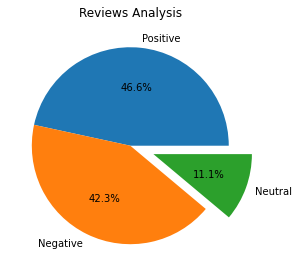

In [14]:
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(counts.values, labels = counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)


### Wordcloud representation for most used words

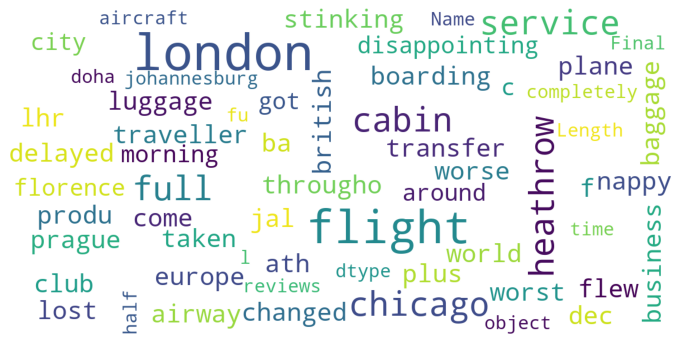

In [16]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['Final reviews'])